In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/LinearRegression/kc_house_data.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [58]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


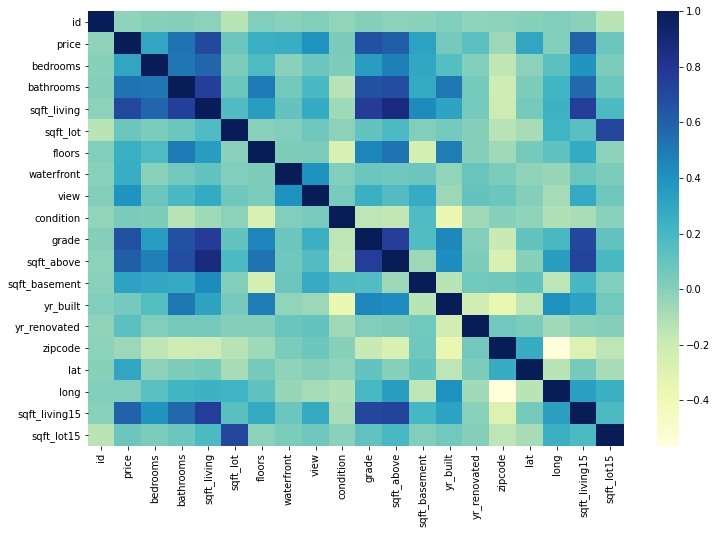

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),cmap="YlGnBu")

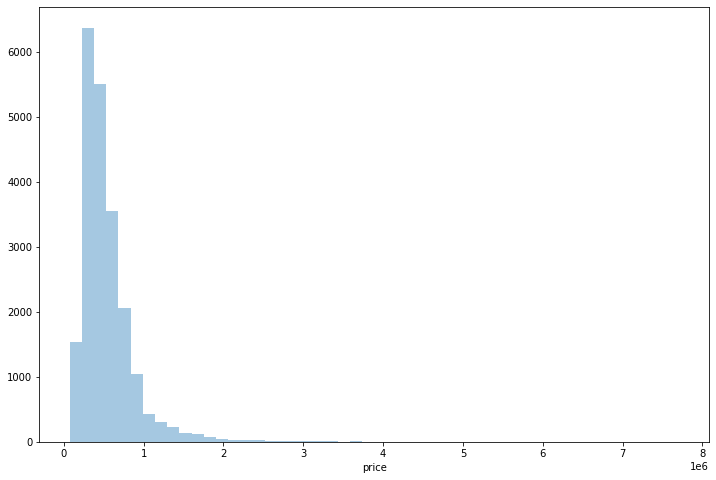

In [60]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'],kde=False)

In [61]:
df['price'].mean()

540088.1417665294

In [62]:
df.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

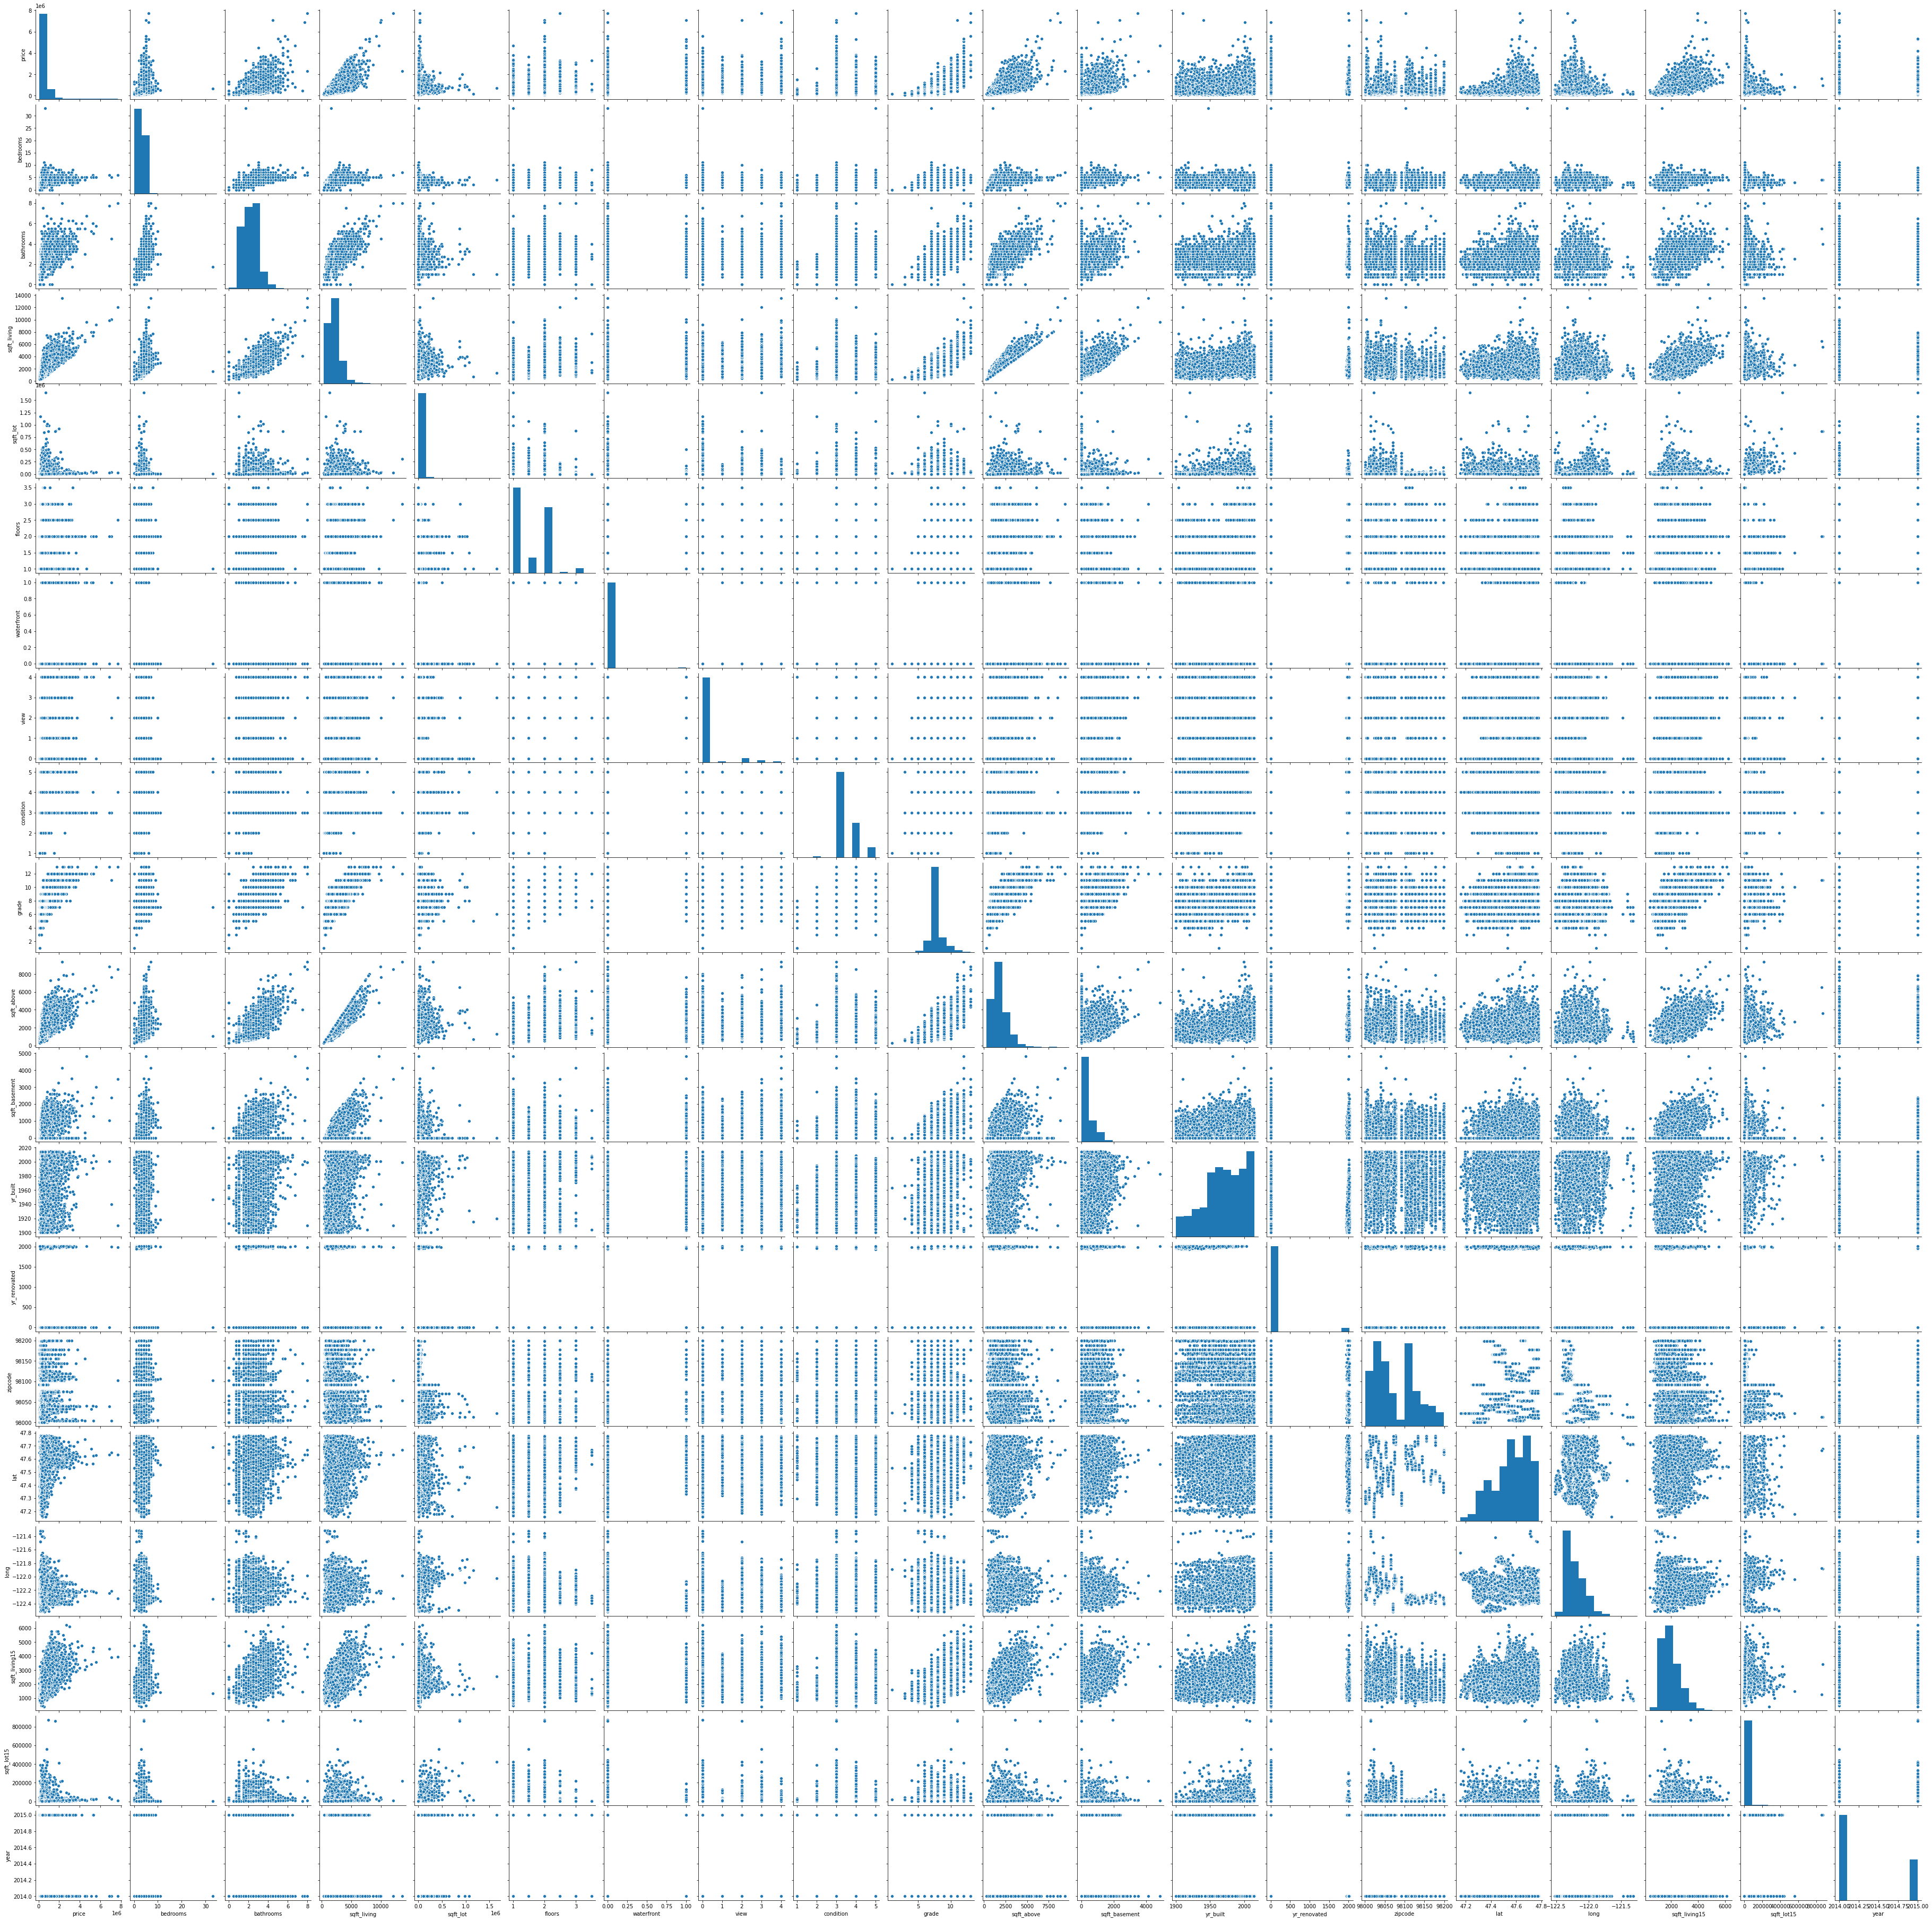

In [116]:
sns.pairplot(df)

In [0]:
df.drop('id',inplace=True,axis=1)

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
df['year']= df['date'].dt.year

In [0]:
df.drop('date',inplace=True,axis=1)

In [67]:
df.corr()['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
year             0.003576
Name: price, dtype: float64

In [0]:
X=df.drop('price',axis=1)
y=df['price']

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ss=StandardScaler().fit(X)

In [0]:
X=ss.transform(X)

In [0]:
y=y.values.reshape(21613,1)

In [0]:
ss=StandardScaler().fit(y)

In [0]:
y=ss.transform(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
X_train

array([[ 0.67648506,  0.8248348 ,  0.56629915, ..., -0.03874153,
        -0.33195157, -0.69065478],
       [-0.39873715,  0.50022075,  0.06543878, ...,  0.28225042,
        -0.13128168, -0.69065478],
       [ 0.67648506, -0.47362141, -0.38098024, ...,  0.16552608,
        -0.01624169, -0.69065478],
       ...,
       [-0.39873715,  0.50022075,  0.04366224, ..., -0.43268619,
        -0.37059124, -0.69065478],
       [-2.54918156, -1.77207762, -1.85089652, ..., -1.19139443,
         0.08173093, -0.69065478],
       [ 0.67648506,  0.50022075,  1.14337739, ...,  1.50785604,
        -0.24800644,  1.44790136]])

In [89]:
y_train

array([[ 0.81693429],
       [-0.64853177],
       [-0.31349027],
       ...,
       [ 0.09509692],
       [-0.8037949 ],
       [-0.61312088]])

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr_model=LinearRegression().fit(X_train,y_train)

In [0]:
predictions=lr_model.predict(X_test)

In [103]:
lr_model.coef_

array([[-0.08270903,  0.08755888,  0.21738425,  0.01209346,  0.01342758,
         0.12284066,  0.11610137,  0.04368454,  0.30256563,  0.20192581,
         0.07330202, -0.2079212 ,  0.02450906, -0.08115338,  0.22497823,
        -0.07387622,  0.03832763, -0.02566821,  0.03844929]])

In [104]:
# R2 error
lr_model.score(X_test,y_test)

0.6979790334126632

In [0]:
from sklearn.metrics import mean_squared_error

In [115]:
# RMS error
np.sqrt(mean_squared_error(y_test,predictions))

0.5792531975981786